## Importation des modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.preprocessing import label_binarize

## Chargement des données

In [2]:
X_train = pd.read_pickle("../data/X_train.pkl").values
X_val   = pd.read_pickle("../data/X_val.pkl").values
y_train = pd.read_pickle("../data/y_train.pkl")["label"].values
y_val   = pd.read_pickle("../data/y_val.pkl")["label"].values

print("Train shape:", X_train.shape)
print("Validation shape:", X_val.shape)

Train shape: (37800, 784)
Validation shape: (4200, 784)


## Création du modèle de régression losgistique

In [3]:
clf = LogisticRegression(
    max_iter=200,
    solver="lbfgs",
    multi_class="multinomial",
    n_jobs=-1
)

print("Entraînement du modèle...")
clf.fit(X_train, y_train)

Entraînement du modèle...


/Users/victorgauthier/PycharmProjects/Kaggle_digits_recognizer/.venv311/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/victorgauthier/PycharmProjects/Kaggle_digits_recognizer/.venv311/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'multinomial'


## Accuracy score

In [4]:
y_pred = clf.predict(X_val)
acc = accuracy_score(y_val, y_pred)
print(f"✅ Accuracy validation: {acc:.4f}")

✅ Accuracy validation: 0.9150


## Matrice de confusion

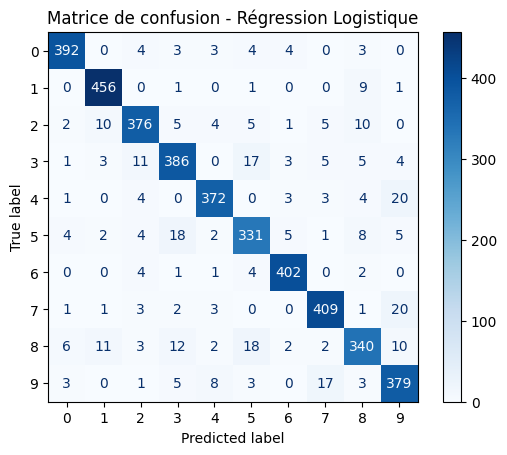

In [5]:
cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap="Blues", values_format="d")
plt.title("Matrice de confusion - Régression Logistique")
plt.show()